In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
df=pd.read_excel('ProjectFinal.xlsx')

In [2]:
df

,abbreviatedAddress,adTargets_cnty,adTargets_price,adTargets_zip,address_city,address_streetAddress,bathrooms,bedrooms,city,datePostedString,...,adTargets_sqft,adTargets_bd,adTargets_zestimate,solarPotential_buildFactor,solarPotential_climateFactor,solarPotential_electricityFactor,solarPotential_solarFactor,solarPotential_sunScore,RentZestimate Range,yearBuilt Range
0,1 Bluxome St APT 301,San_Francisco,995000,94107,San Francisco,1 Bluxome St APT 301,2,1,San Francisco,2022-02-25,...,912,1,922400,79.2,6.73,5.02,2.80,93.74,"(1986.7, 3500.4]","(2001.42, 2006.565]"
1,1 Kelton Ct APT 4J,Alameda,575000,94611,Oakland,1 Kelton Ct APT 4J,1,1,Oakland,2022-02-11,...,720,1,586200,73.6,6.82,5.02,2.52,87.95,"(1986.7, 3500.4]","(1970.55, 1975.695]"
2,1 Lakeside Dr APT 415,Alameda,618000,94612,Oakland,1 Lakeside Dr APT 415,1,1,Oakland,2022-02-24,...,833,1,653400,80.0,6.82,5.02,2.80,94.63,"(1986.7, 3500.4]","(1996.275, 2001.42]"
3,1 Loma Vista Ter,San_Francisco,1495000,94114,San Francisco,1 Loma Vista Ter,1,3,San Francisco,2022-02-21,...,1905,3,2347400,79.2,6.62,5.02,1.28,92.12,"(5014.1, 6527.8]","(1919.1, 1924.245]"
4,1 S Park St APT 402,San_Francisco,1975000,94107,San Francisco,1 S Park St APT 402,3,2,San Francisco,2022-02-17,...,1389,2,1964300,80.0,6.73,5.02,2.80,94.54,"(5014.1, 6527.8]","(2006.565, 2011.71]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,978 Rutland St,San_Francisco,1275000,94134,San Francisco,978 Rutland St,2,2,San Francisco,2022-02-22,...,875,2,916600,80.0,6.62,5.02,0.88,92.52,"(1986.7, 3500.4]","(1903.665, 1908.81]"
668,989 Franklin St APT 403,Alameda,359000,94607,Oakland,989 Franklin St APT 403,1,1,Oakland,2022-02-03,...,533,1,367000,72.0,6.82,5.02,2.44,86.27,"(1986.7, 3500.4]","(2001.42, 2006.565]"
669,989 Woodgrove Ln,Santa_Clara,1499888,95136,San Jose,989 Woodgrove Ln,2,3,San Jose,2022-02-25,...,1486,3,1238100,79.2,7.03,5.02,3.16,94.41,"(3500.4, 5014.1]","(1965.405, 1970.55]"
670,9908 Saint Elmo Dr,Alameda,568000,94603,Oakland,9908 Saint Elmo Dr,1,3,Oakland,2022-02-17,...,1017,3,603176,80.0,6.86,5.02,2.80,94.67,"(1986.7, 3500.4]","(1939.68, 1944.825]"


In [3]:
pd.options.display.max_rows = 4000

In [4]:
df.head()

,abbreviatedAddress,adTargets_cnty,adTargets_price,adTargets_zip,address_city,address_streetAddress,bathrooms,bedrooms,city,datePostedString,...,adTargets_sqft,adTargets_bd,adTargets_zestimate,solarPotential_buildFactor,solarPotential_climateFactor,solarPotential_electricityFactor,solarPotential_solarFactor,solarPotential_sunScore,RentZestimate Range,yearBuilt Range
0,1 Bluxome St APT 301,San_Francisco,995000,94107,San Francisco,1 Bluxome St APT 301,2,1,San Francisco,2022-02-25,...,912,1,922400,79.2,6.73,5.02,2.80,93.74,"(1986.7, 3500.4]","(2001.42, 2006.565]"
1,1 Kelton Ct APT 4J,Alameda,575000,94611,Oakland,1 Kelton Ct APT 4J,1,1,Oakland,2022-02-11,...,720,1,586200,73.6,6.82,5.02,2.52,87.95,"(1986.7, 3500.4]","(1970.55, 1975.695]"
2,1 Lakeside Dr APT 415,Alameda,618000,94612,Oakland,1 Lakeside Dr APT 415,1,1,Oakland,2022-02-24,...,833,1,653400,80.0,6.82,5.02,2.80,94.63,"(1986.7, 3500.4]","(1996.275, 2001.42]"
3,1 Loma Vista Ter,San_Francisco,1495000,94114,San Francisco,1 Loma Vista Ter,1,3,San Francisco,2022-02-21,...,1905,3,2347400,79.2,6.62,5.02,1.28,92.12,"(5014.1, 6527.8]","(1919.1, 1924.245]"
4,1 S Park St APT 402,San_Francisco,1975000,94107,San Francisco,1 S Park St APT 402,3,2,San Francisco,2022-02-17,...,1389,2,1964300,80.0,6.73,5.02,2.80,94.54,"(5014.1, 6527.8]","(2006.565, 2011.71]"


In [5]:
df.describe()

,adTargets_price,adTargets_zip,bathrooms,bedrooms,daysOnZillow,lastSoldPrice,livingArea,price,rentZestimate,resoFacts_hasGarage,yearBuilt,zestimate,adTargets_sqft,adTargets_bd,adTargets_zestimate,solarPotential_buildFactor,solarPotential_climateFactor,solarPotential_electricityFactor,solarPotential_solarFactor,solarPotential_sunScore
count,6.720000e+02,672.000000,672.000000,672.000000,672.000000,6.720000e+02,672.000000,6.720000e+02,672.000000,672.000000,672.000000,6.720000e+02,672.000000,672.000000,6.720000e+02,672.00000,672.000000,6.720000e+02,672.000000,672.000000
mean,2.205159e+06,94661.150298,2.273810,2.982143,7.668155,6.113617e+05,1617.283929,2.205159e+06,3915.229167,0.345238,1958.148810,1.454661e+06,1630.004464,2.971726,1.454661e+06,71.34881,6.902574,5.020000e+00,2.612083,85.878720
std,2.229900e+07,422.247598,1.079285,1.277914,13.418685,5.527464e+05,845.643249,2.229900e+07,1448.847433,0.475800,71.318612,8.860453e+05,861.049904,1.297977,8.860453e+05,16.60403,0.154608,1.599912e-14,0.648865,16.599715
min,1.399000e+05,94040.000000,1.000000,1.000000,0.000000,0.000000e+00,407.000000,1.399000e+05,473.000000,0.000000,993.000000,1.400000e+05,407.000000,0.000000,1.400000e+05,8.00000,6.530000,5.020000e+00,0.800000,22.270000
25%,7.490000e+05,94124.000000,2.000000,2.000000,1.000000,2.087500e+05,1087.250000,7.490000e+05,2999.000000,0.000000,1942.000000,7.995500e+05,1090.000000,2.000000,7.995500e+05,72.00000,6.820000,5.020000e+00,2.680000,86.750000
50%,1.150000e+06,94609.500000,2.000000,3.000000,3.000000,5.100000e+05,1423.000000,1.150000e+06,3659.500000,0.000000,1968.000000,1.245050e+06,1433.500000,3.000000,1.245050e+06,78.40000,6.960000,5.020000e+00,2.800000,92.460000
75%,1.689750e+06,95121.000000,3.000000,4.000000,8.000000,8.562500e+05,1912.000000,1.689750e+06,4498.000000,1.000000,1988.000000,1.790025e+06,1937.250000,4.000000,1.790025e+06,80.00000,7.030000,5.020000e+00,3.000000,94.440000
max,5.790000e+08,95377.000000,10.000000,12.000000,144.000000,3.425000e+06,8224.000000,5.790000e+08,15610.000000,1.000000,2022.000000,7.884400e+06,8224.000000,12.000000,7.884400e+06,80.80000,7.070000,5.020000e+00,3.240000,96.010000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   abbreviatedAddress                672 non-null    object 
 1   adTargets_cnty                    672 non-null    object 
 2   adTargets_price                   672 non-null    int64  
 3   adTargets_zip                     672 non-null    int64  
 4   address_city                      672 non-null    object 
 5   address_streetAddress             672 non-null    object 
 6   bathrooms                         672 non-null    int64  
 7   bedrooms                          672 non-null    int64  
 8   city                              672 non-null    object 
 9   datePostedString                  672 non-null    object 
 10  dateSoldString                    672 non-null    object 
 11  daysOnZillow                      672 non-null    int64  
 12  keystone

In [7]:
df.corr()

,adTargets_price,adTargets_zip,bathrooms,bedrooms,daysOnZillow,lastSoldPrice,livingArea,price,rentZestimate,resoFacts_hasGarage,yearBuilt,zestimate,adTargets_sqft,adTargets_bd,adTargets_zestimate,solarPotential_buildFactor,solarPotential_climateFactor,solarPotential_electricityFactor,solarPotential_solarFactor,solarPotential_sunScore
adTargets_price,1.000000,-0.053775,-0.024080,-0.040903,-0.020349,0.003701,-0.019585,1.000000,0.004934,0.048775,0.005498,-0.003037,-0.019372,-0.069629,-0.003037,0.019567,-0.069520,NaN,-0.059711,0.016602
adTargets_zip,-0.053775,1.000000,0.036114,0.143494,-0.031868,-0.173232,0.026462,-0.053775,-0.249744,-0.374570,0.147062,-0.123549,0.011885,0.150448,-0.123549,-0.085458,0.725889,NaN,0.571107,-0.056348
bathrooms,-0.024080,0.036114,1.000000,0.711302,-0.025102,0.286423,0.738373,-0.024080,0.542170,-0.001520,-0.030715,0.556516,0.743456,0.709793,0.556516,-0.027425,0.075525,NaN,0.030765,-0.025503
bedrooms,-0.040903,0.143494,0.711302,1.000000,-0.016946,0.086943,0.681166,-0.040903,0.442051,-0.107496,-0.122399,0.494232,0.679116,0.997009,0.494232,-0.052074,0.156902,NaN,0.075460,-0.047652
daysOnZillow,-0.020349,-0.031868,-0.025102,-0.016946,1.000000,-0.076558,0.007636,-0.020349,-0.048090,-0.022878,0.008994,0.055848,0.002988,-0.013973,0.055848,-0.072430,0.088080,NaN,0.098860,-0.067777
lastSoldPrice,0.003701,-0.173232,0.286423,0.086943,-0.076558,1.000000,0.226663,0.003701,0.406505,0.032691,0.019992,0.392781,0.227564,0.088088,0.392781,-0.008830,-0.138621,NaN,-0.065957,-0.012698
livingArea,-0.019585,0.026462,0.738373,0.681166,0.007636,0.226663,1.000000,-0.019585,0.643173,0.020524,-0.049957,0.716230,0.986885,0.669539,0.716230,-0.049408,0.043296,NaN,0.002020,-0.048914
price,1.000000,-0.053775,-0.024080,-0.040903,-0.020349,0.003701,-0.019585,1.000000,0.004934,0.048775,0.005498,-0.003037,-0.019372,-0.069629,-0.003037,0.019567,-0.069520,NaN,-0.059711,0.016602
rentZestimate,0.004934,-0.249744,0.542170,0.442051,-0.048090,0.406505,0.643173,0.004934,1.000000,0.071891,-0.080751,0.782479,0.632297,0.442190,0.782479,-0.031765,-0.220120,NaN,-0.194110,-0.041387
resoFacts_hasGarage,0.048775,-0.374570,-0.001520,-0.107496,-0.022878,0.032691,0.020524,0.048775,0.071891,1.000000,-0.143506,-0.138392,0.037119,-0.107242,-0.138392,0.050382,-0.590500,NaN,-0.396622,0.029381


In [8]:
label_encoder = LabelEncoder()
df['city_coded']=label_encoder.fit_transform(df['city'])
df['propertyTypeDimension_coded']=label_encoder.fit_transform(df['propertyTypeDimension'])

In [9]:
df

,abbreviatedAddress,adTargets_cnty,adTargets_price,adTargets_zip,address_city,address_streetAddress,bathrooms,bedrooms,city,datePostedString,...,adTargets_zestimate,solarPotential_buildFactor,solarPotential_climateFactor,solarPotential_electricityFactor,solarPotential_solarFactor,solarPotential_sunScore,RentZestimate Range,yearBuilt Range,city_coded,propertyTypeDimension_coded
0,1 Bluxome St APT 301,San_Francisco,995000,94107,San Francisco,1 Bluxome St APT 301,2,1,San Francisco,2022-02-25,...,922400,79.2,6.73,5.02,2.80,93.74,"(1986.7, 3500.4]","(2001.42, 2006.565]",9,0
1,1 Kelton Ct APT 4J,Alameda,575000,94611,Oakland,1 Kelton Ct APT 4J,1,1,Oakland,2022-02-11,...,586200,73.6,6.82,5.02,2.52,87.95,"(1986.7, 3500.4]","(1970.55, 1975.695]",7,0
2,1 Lakeside Dr APT 415,Alameda,618000,94612,Oakland,1 Lakeside Dr APT 415,1,1,Oakland,2022-02-24,...,653400,80.0,6.82,5.02,2.80,94.63,"(1986.7, 3500.4]","(1996.275, 2001.42]",7,0
3,1 Loma Vista Ter,San_Francisco,1495000,94114,San Francisco,1 Loma Vista Ter,1,3,San Francisco,2022-02-21,...,2347400,79.2,6.62,5.02,1.28,92.12,"(5014.1, 6527.8]","(1919.1, 1924.245]",9,4
4,1 S Park St APT 402,San_Francisco,1975000,94107,San Francisco,1 S Park St APT 402,3,2,San Francisco,2022-02-17,...,1964300,80.0,6.73,5.02,2.80,94.54,"(5014.1, 6527.8]","(2006.565, 2011.71]",9,0
5,10 Bertie Minor Ln APT 4,San_Francisco,699000,94115,San Francisco,10 Bertie Minor Ln APT 4,2,3,San Francisco,2022-02-22,...,645200,80.0,6.62,5.02,2.80,94.44,"(3500.4, 5014.1]","(1960.26, 1965.405]",9,0
6,100 Foerster St,San_Francisco,2390000,94112,San Francisco,100 Foerster St,3,4,San Francisco,2022-02-18,...,2755400,68.0,6.62,5.02,0.88,80.52,"(3500.4, 5014.1]","(1924.245, 1929.39]",9,4
7,1006 Bellhurst Ave,Santa_Clara,574888,95122,San Jose,1006 Bellhurst Ave,2,3,San Jose,2022-02-23,...,646749,79.2,7.03,5.02,2.64,93.89,"(1986.7, 3500.4]","(1965.405, 1970.55]",10,5
8,101 Crescent Way APT 2410,San_Francisco,799888,94134,San Francisco,101 Crescent Way APT 2410,2,2,San Francisco,2022-02-16,...,799900,78.4,6.73,5.02,0.88,91.02,"(1986.7, 3500.4]","(1996.275, 2001.42]",9,0
9,1018 4th Ave APT 101,Alameda,599000,94606,Oakland,1018 4th Ave APT 101,1,1,Oakland,2022-02-14,...,600500,78.4,6.82,5.02,2.80,93.04,"(457.863, 1986.7]","(1970.55, 1975.695]",7,0


In [10]:
df.groupby(['city','city_coded'])['city'].count()

city           city_coded
Berkeley       0               2
Dublin         1               2
Fremont        2              11
Hayward        3              26
Livermore      4               2
Los Gatos      5               1
Mountain View  6              22
Oakland        7             165
Pleasanton     8               2
San Francisco  9             133
San Jose       10            232
Santa Clara    11             26
Stockton       12              2
Sunnyvale      13             41
Tracy          14              5
Name: city, dtype: int64

In [11]:
df.groupby(['propertyTypeDimension_coded','propertyTypeDimension'])['propertyTypeDimension_coded'].count()

propertyTypeDimension_coded  propertyTypeDimension
0                            Condo                    170
1                            Lot                        1
2                            Manufactured               4
3                            Multi Family              14
4                            Single Family            433
5                            Townhouse                 50
Name: propertyTypeDimension_coded, dtype: int64

In [12]:
df.corr()

,adTargets_price,adTargets_zip,bathrooms,bedrooms,daysOnZillow,lastSoldPrice,livingArea,price,rentZestimate,resoFacts_hasGarage,...,adTargets_sqft,adTargets_bd,adTargets_zestimate,solarPotential_buildFactor,solarPotential_climateFactor,solarPotential_electricityFactor,solarPotential_solarFactor,solarPotential_sunScore,city_coded,propertyTypeDimension_coded
adTargets_price,1.000000,-0.053775,-0.024080,-0.040903,-0.020349,0.003701,-0.019585,1.000000,0.004934,0.048775,...,-0.019372,-0.069629,-0.003037,0.019567,-0.069520,NaN,-0.059711,0.016602,0.008420,-0.053847
adTargets_zip,-0.053775,1.000000,0.036114,0.143494,-0.031868,-0.173232,0.026462,-0.053775,-0.249744,-0.374570,...,0.011885,0.150448,-0.123549,-0.085458,0.725889,NaN,0.571107,-0.056348,0.210417,0.168931
bathrooms,-0.024080,0.036114,1.000000,0.711302,-0.025102,0.286423,0.738373,-0.024080,0.542170,-0.001520,...,0.743456,0.709793,0.556516,-0.027425,0.075525,NaN,0.030765,-0.025503,0.015015,0.321181
bedrooms,-0.040903,0.143494,0.711302,1.000000,-0.016946,0.086943,0.681166,-0.040903,0.442051,-0.107496,...,0.679116,0.997009,0.494232,-0.052074,0.156902,NaN,0.075460,-0.047652,-0.016033,0.504661
daysOnZillow,-0.020349,-0.031868,-0.025102,-0.016946,1.000000,-0.076558,0.007636,-0.020349,-0.048090,-0.022878,...,0.002988,-0.013973,0.055848,-0.072430,0.088080,NaN,0.098860,-0.067777,-0.223340,-0.026760
lastSoldPrice,0.003701,-0.173232,0.286423,0.086943,-0.076558,1.000000,0.226663,0.003701,0.406505,0.032691,...,0.227564,0.088088,0.392781,-0.008830,-0.138621,NaN,-0.065957,-0.012698,0.059091,-0.010157
livingArea,-0.019585,0.026462,0.738373,0.681166,0.007636,0.226663,1.000000,-0.019585,0.643173,0.020524,...,0.986885,0.669539,0.716230,-0.049408,0.043296,NaN,0.002020,-0.048914,-0.032496,0.343677
price,1.000000,-0.053775,-0.024080,-0.040903,-0.020349,0.003701,-0.019585,1.000000,0.004934,0.048775,...,-0.019372,-0.069629,-0.003037,0.019567,-0.069520,NaN,-0.059711,0.016602,0.008420,-0.053847
rentZestimate,0.004934,-0.249744,0.542170,0.442051,-0.048090,0.406505,0.643173,0.004934,1.000000,0.071891,...,0.632297,0.442190,0.782479,-0.031765,-0.220120,NaN,-0.194110,-0.041387,0.037076,0.210414
resoFacts_hasGarage,0.048775,-0.374570,-0.001520,-0.107496,-0.022878,0.032691,0.020524,0.048775,0.071891,1.000000,...,0.037119,-0.107242,-0.138392,0.050382,-0.590500,NaN,-0.396622,0.029381,-0.296075,-0.179148


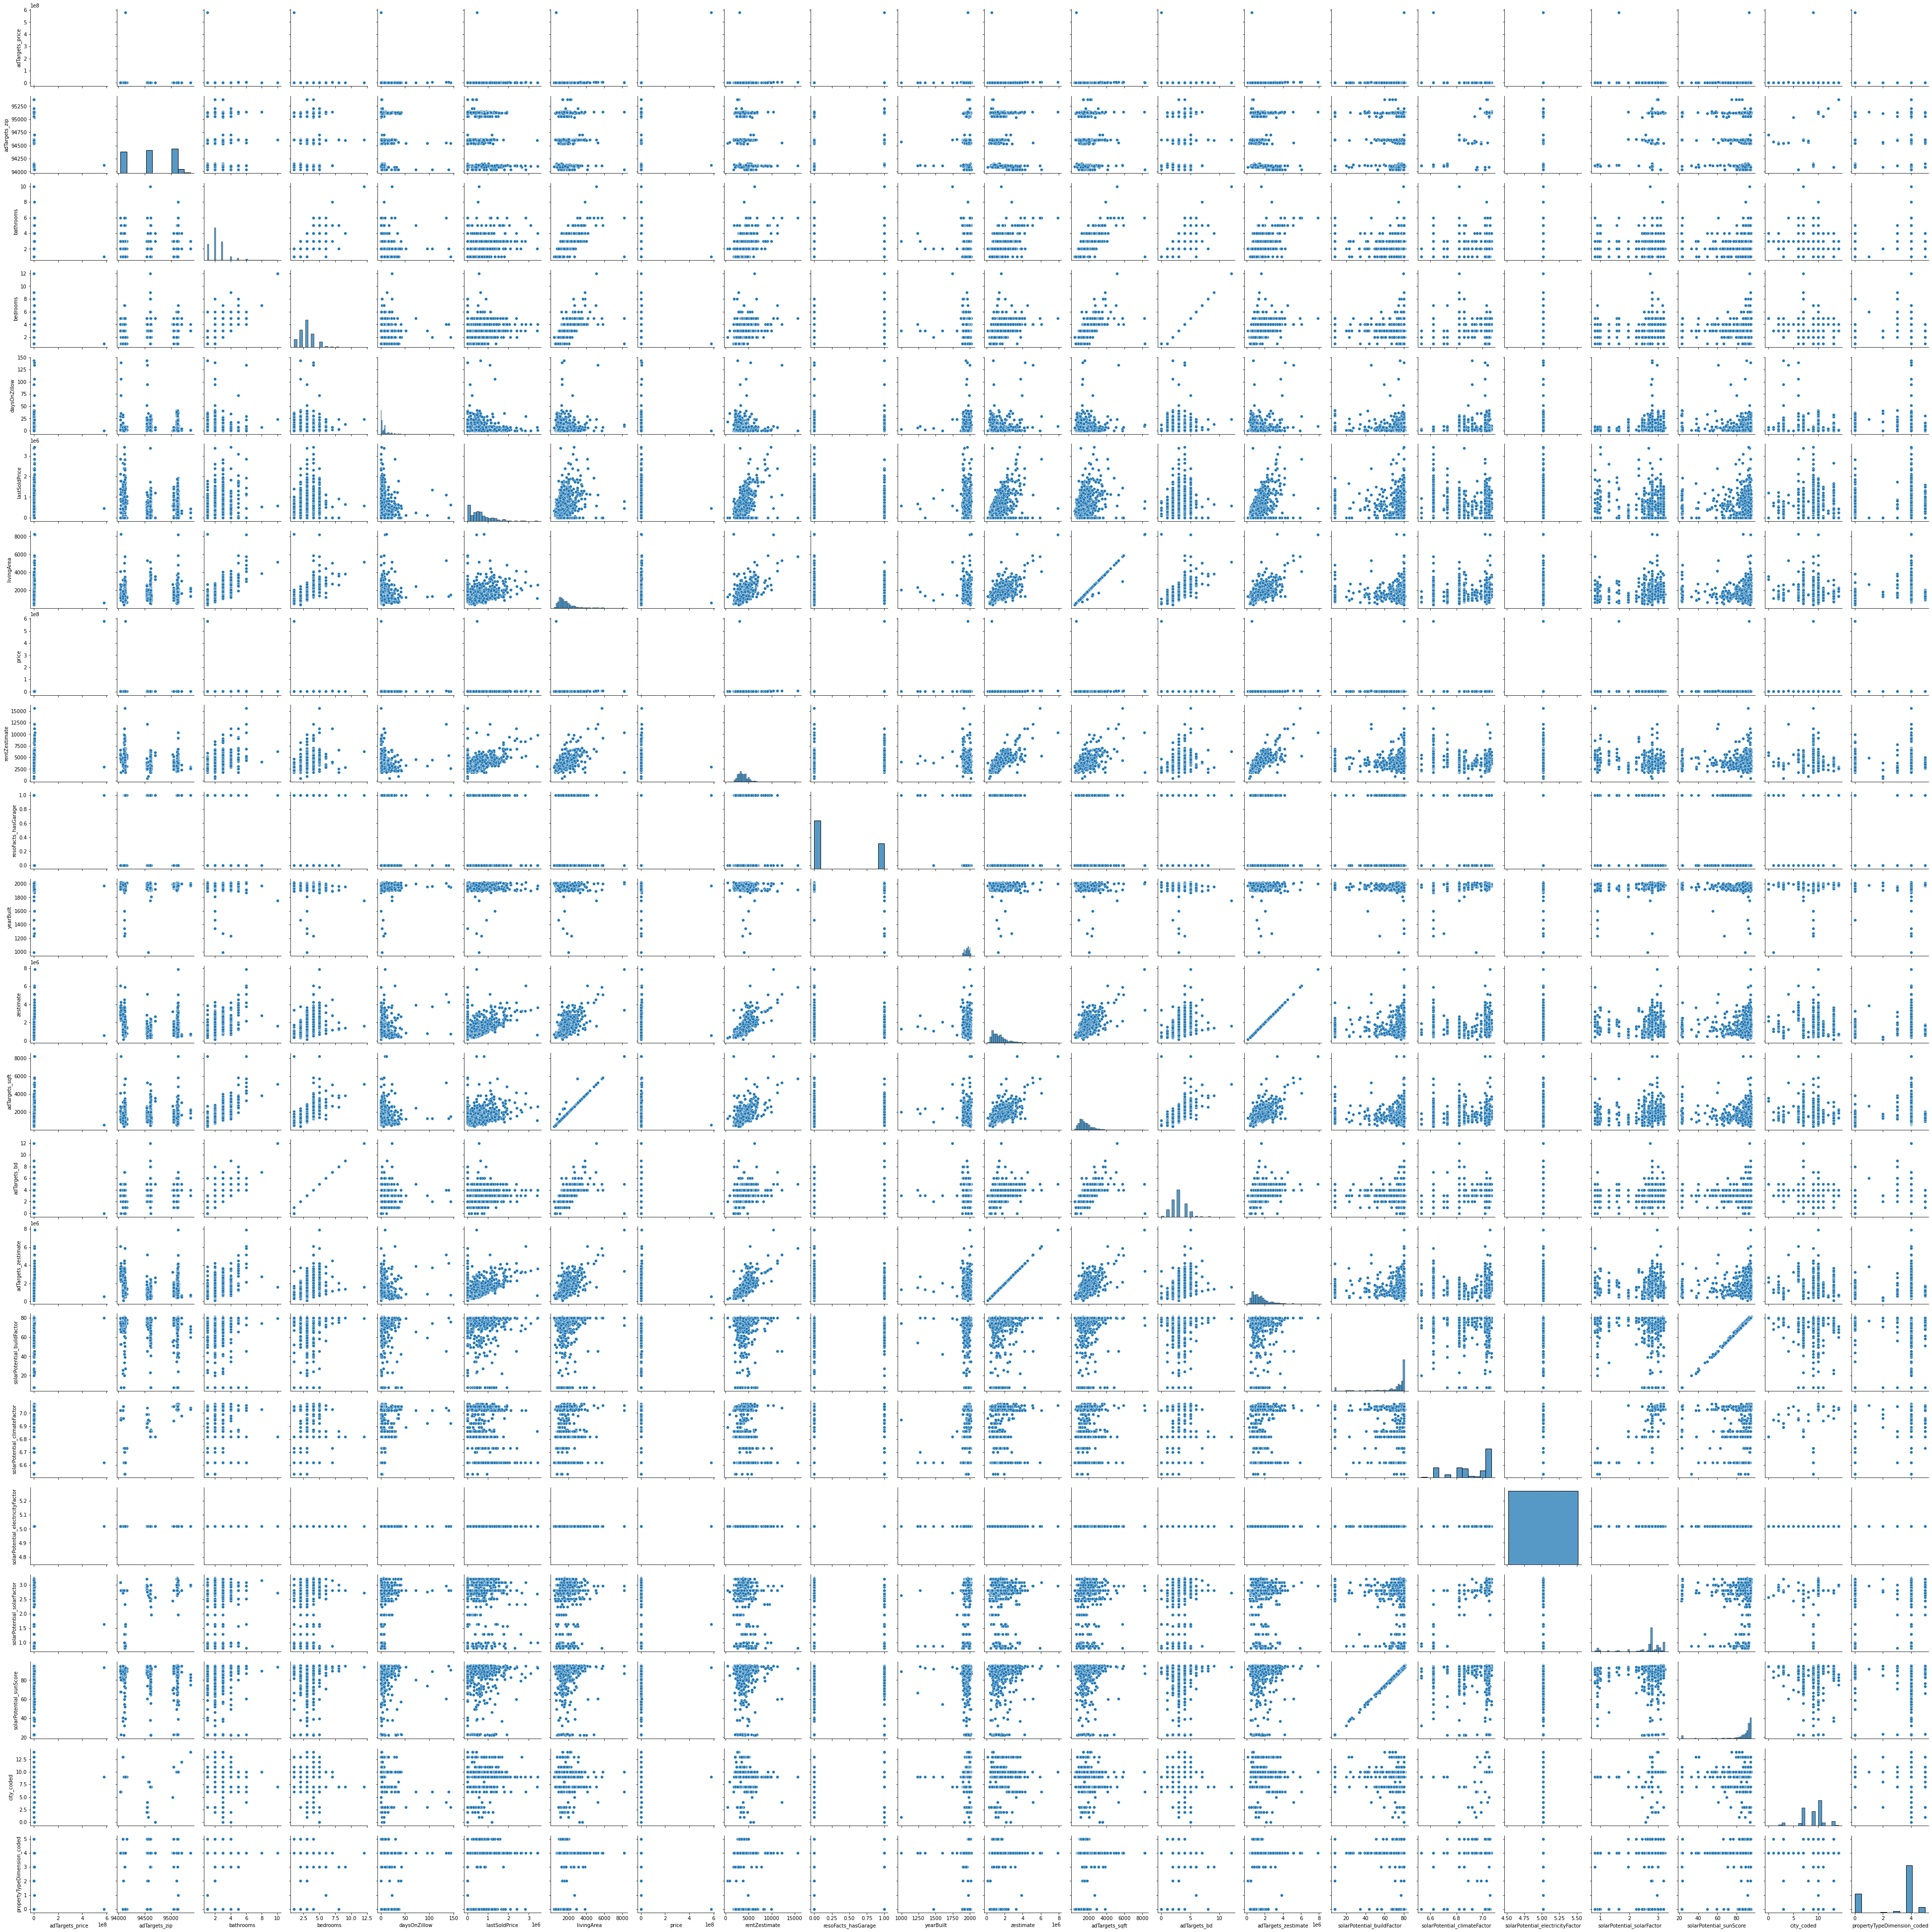

In [13]:
sns.pairplot(df)

<AxesSubplot:>

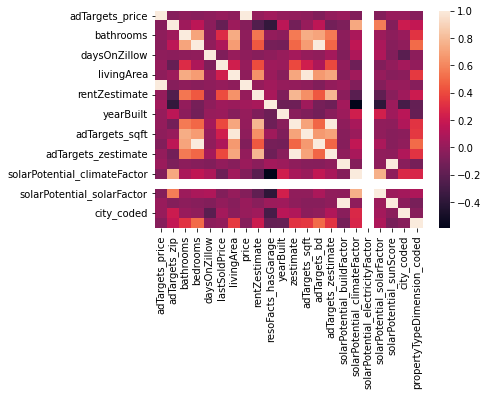

In [14]:
cr=df.corr()
sns.heatmap(cr)

In [15]:
cr["rentZestimate"].sort_values(ascending=False)

rentZestimate                       1.000000
adTargets_zestimate                 0.782479
zestimate                           0.782479
livingArea                          0.643173
adTargets_sqft                      0.632297
bathrooms                           0.542170
adTargets_bd                        0.442190
bedrooms                            0.442051
lastSoldPrice                       0.406505
propertyTypeDimension_coded         0.210414
resoFacts_hasGarage                 0.071891
city_coded                          0.037076
adTargets_price                     0.004934
price                               0.004934
solarPotential_buildFactor         -0.031765
solarPotential_sunScore            -0.041387
daysOnZillow                       -0.048090
yearBuilt                          -0.080751
solarPotential_solarFactor         -0.194110
solarPotential_climateFactor       -0.220120
adTargets_zip                      -0.249744
solarPotential_electricityFactor         NaN
Name: rent

C:\Users\jetma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rentZestimate', ylabel='Density'>

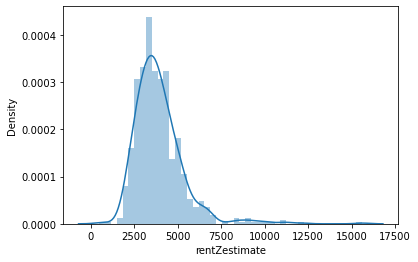

In [16]:
sns.distplot(df['rentZestimate'])

C:\Users\jetma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='livingArea', ylabel='Density'>

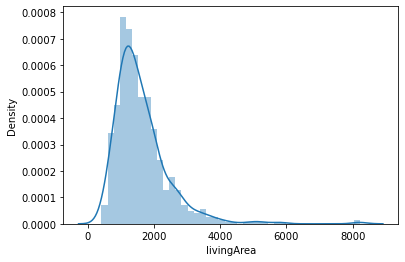

In [17]:
sns.distplot(df['livingArea'])

In [18]:
df.columns

Index(['abbreviatedAddress', 'adTargets_cnty', 'adTargets_price',
       'adTargets_zip', 'address_city', 'address_streetAddress', 'bathrooms',
       'bedrooms', 'city', 'datePostedString', 'dateSoldString',
       'daysOnZillow', 'keystoneHomeStatus', 'lastSoldPrice', 'livingArea',
       'price', 'propertyTypeDimension', 'regionString', 'rentZestimate',
       'resoFacts_cityRegion', 'resoFacts_hasGarage', 'timeOnZillow',
       'yearBuilt', 'zestimate', 'adTargets_sqft', 'adTargets_bd',
       'adTargets_zestimate', 'solarPotential_buildFactor',
       'solarPotential_climateFactor', 'solarPotential_electricityFactor',
       'solarPotential_solarFactor', 'solarPotential_sunScore',
       'RentZestimate Range', 'yearBuilt Range', 'city_coded',
       'propertyTypeDimension_coded'],
      dtype='object')

In [19]:
X=df[['lastSoldPrice','solarPotential_climateFactor','zestimate','livingArea','adTargets_sqft','bathrooms','bedrooms','propertyTypeDimension_coded','resoFacts_hasGarage','adTargets_zip']]
Y=df['rentZestimate']

In [20]:
from sklearn.model_selection import train_test_split
train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [23]:
lm.intercept_

-9618.853195583728

In [24]:
lm.coef_

array([ 4.45614080e-05, -3.53152406e+03,  1.15038474e-03,  6.15132687e-01,
       -6.64270281e-01,  1.39826071e+02,  1.20899767e+02, -1.57487299e+01,
       -2.32518270e+01,  3.76655064e-01])

In [25]:
cdf=pd.DataFrame(lm.coef_,X_train.columns,columns=['coef'])
cdf

,coef
lastSoldPrice,0.000045
solarPotential_climateFactor,-3531.524064
zestimate,0.001150
livingArea,0.615133
adTargets_sqft,-0.664270
bathrooms,139.826071
bedrooms,120.899767
propertyTypeDimension_coded,-15.748730
resoFacts_hasGarage,-23.251827
adTargets_zip,0.376655


In [26]:
predictions=lm.predict(X_test)
predictions

array([2513.98221493, 3678.76798602, 5096.63548482, 2960.02683948,
       3775.28670814, 3743.9361561 , 3772.54389231, 5000.31105431,
       3218.97877451, 2710.86121034, 5317.79470719, 2304.83070796,
       4200.27189803, 4267.90480638, 3836.37064461, 2864.67710065,
       5012.92622449, 3964.49629792, 2573.00993951, 2662.7253799 ,
       4318.91194922, 3019.0804736 , 3951.64449326, 2730.54134784,
       2508.89347005, 4403.66973232, 3931.67786079, 2860.50539604,
       3368.24148882, 2669.75827254, 5312.49749737, 3831.29959188,
       4890.99918004, 2742.96684307, 2521.46954086, 3888.33591934,
       3185.19284939, 4676.54083291, 3230.79549541, 5203.28784053,
       4224.28847684, 5650.59458548, 4096.38969871, 4583.62652702,
       3916.91631354, 7658.17505133, 3713.84692053, 3243.67407736,
       3122.19430515, 5041.46944081, 4086.18211738, 2682.09179634,
       3485.34815224, 3521.33018445, 3301.67786778, 2915.17834639,
       3166.62056328, 2654.37122178, 4930.64002213, 5096.63222

<AxesSubplot:xlabel='rentZestimate'>

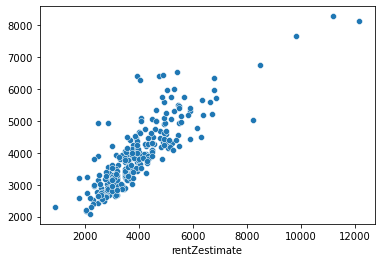

In [27]:
sns.scatterplot(x=Y_test,y=predictions)

<AxesSubplot:xlabel='rentZestimate'>

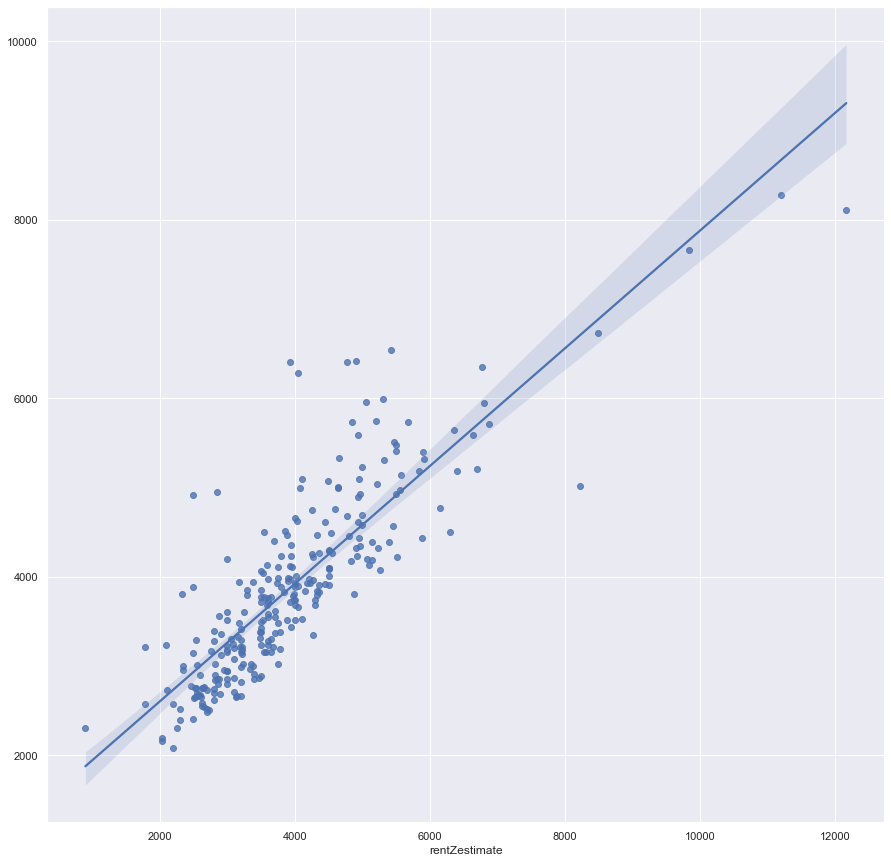

In [42]:
sns.regplot(x=Y_test,y=predictions)

C:\Users\jetma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rentZestimate', ylabel='Density'>

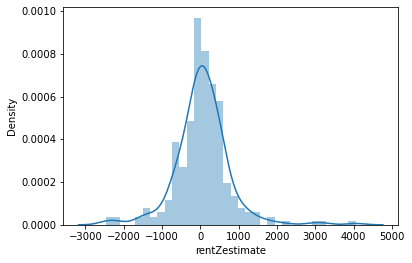

In [28]:
sns.distplot((Y_test-predictions))

In [29]:
from sklearn import metrics

In [30]:
metrics.mean_absolute_error(Y_test,predictions)

480.80272982902005

In [31]:
metrics.mean_squared_error(Y_test,predictions)

525375.6901676746

In [32]:
np.sqrt(metrics.mean_squared_error(Y_test,predictions))

724.8280417917581

In [33]:
dfc=pd.concat([X_test,Y_test],axis=1)
df3=pd.DataFrame(predictions)
Final_df=pd.concat([dfc,df3],axis=1)
Final_df.rename(columns={0:'Predicted_Price'},inplace=True)

In [34]:
Final_df

,lastSoldPrice,solarPotential_climateFactor,zestimate,livingArea,adTargets_sqft,bathrooms,bedrooms,propertyTypeDimension_coded,resoFacts_hasGarage,adTargets_zip,rentZestimate,Predicted_Price
0,950000.0,6.73,922400.0,912.0,912.0,2.0,1.0,0.0,1.0,94107.0,3499.0,2513.982215
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3678.767986
2,344000.0,6.82,653400.0,833.0,833.0,1.0,1.0,0.0,1.0,94612.0,2600.0,5096.635485
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2960.026839
4,1750000.0,6.73,1964300.0,1389.0,1389.0,3.0,2.0,0.0,1.0,94107.0,5549.0,3775.286708
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3743.936156
6,1200000.0,6.62,2755400.0,2216.0,2216.0,3.0,4.0,4.0,0.0,94112.0,3934.0,3772.543892
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.311054
8,556500.0,6.73,799900.0,984.0,984.0,2.0,2.0,0.0,0.0,94134.0,3170.0,3218.978775
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2710.861210


In [175]:
Final_df.to_excel ('Project_RegressionOutPut.xlsx', index = False, header=True)